In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New section

**1. Load the dataset (5 points)
a. Tip: As the dataset is large, use fewer rows. Check what is working well on your
machine and decide accordingly**

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score 
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

# pd.set_option('display.max_rows', 400)
# pd.set_option('display.max_columns', 00)  
# pd.set_option('display.expand_frame_repr', False)

# pd.set_option('max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset from blogtext
blogdf  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/blogtext.csv')


In [4]:
#checking the data
blogdf.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
#info of the data
blogdf.info()
#contains 5 object column and 2 integer columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [115]:
print('shape of the data is')
blogdf.shape

shape of the data is


(681284, 7)

In [7]:
blogdf.tail()

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [8]:
#both male and female are equal contributors of blogs
blogdf['gender'].value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [10]:
#the contributors of blog agewise
blogdf['age'].value_counts()

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64

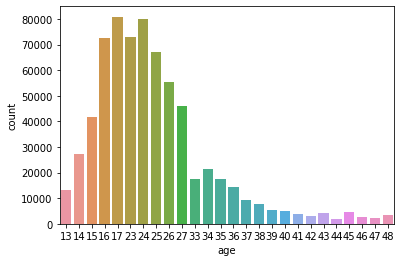

In [68]:
sns.countplot(x = 'age' , data = blogdf)


Majority of the bloggers are between the age group 17 - 27

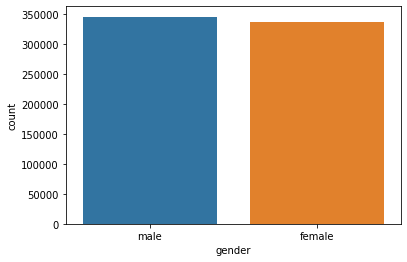

In [69]:
sns.countplot(x = 'gender' , data = blogdf)

Both men and women have contributed almost equally in blog posting

In [70]:
#contributors of blog according to sign
blogdf['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

In [71]:
#checking the number of male contributors of blog according to zodiac sign
blogdf[blogdf['gender'] == 'male'].groupby(['sign']).count()

,id,gender,age,topic,date,text
sign,,,,,,
Aquarius,26687,26687,26687,26687,26687,26687
Aries,34034,34034,34034,34034,34034,34034
Cancer,31136,31136,31136,31136,31136,31136
Capricorn,22980,22980,22980,22980,22980,22980
Gemini,27718,27718,27718,27718,27718,27718
Leo,28652,28652,28652,28652,28652,28652
Libra,29812,29812,29812,29812,29812,29812
Pisces,26194,26194,26194,26194,26194,26194
Sagittarius,26288,26288,26288,26288,26288,26288


In [72]:
#checking the number of female contributors of blog according to zodiac sign
blogdf[blogdf['gender'] == 'female'].groupby(['sign']).count()

,id,gender,age,topic,date,text
sign,,,,,,
Aquarius,23000,23000,23000,23000,23000,23000
Aries,30945,30945,30945,30945,30945,30945
Cancer,33912,33912,33912,33912,33912,33912
Capricorn,26221,26221,26221,26221,26221,26221
Gemini,24267,24267,24267,24267,24267,24267
Leo,25159,25159,25159,25159,25159,25159
Libra,32551,32551,32551,32551,32551,32551
Pisces,27859,27859,27859,27859,27859,27859
Sagittarius,23748,23748,23748,23748,23748,23748


**Use case 1 :As the data size is huge considering only 96000 blogs for this use case. Considering equal number of male and female blog contributors according to zodiac sign**

In [10]:

blogdf1 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Virgo') ].head(4000)
blogdf2 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Taurus') ].tail(4000)
blogdf3 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Scorpio') ].sample(4000)
blogdf4 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Sagittarius') ].head(4000)
blogdf5 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Aquarius') ].tail(4000)
blogdf6 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Pisces') ].sample(4000)
blogdf7 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Libra') ].sample(4000)
blogdf8 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Leo') ].head(4000)
blogdf9 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Gemini') ].tail(4000)
blogdf10 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Capricorn') ].sample(4000)
blogdf11 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Cancer') ].head(4000)
blogdf12 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Aries') ].sample(4000)

In [11]:
blogfdf1 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Virgo') ].head(4000)
blogfdf2 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Taurus') ].sample(4000)
blogfdf3 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Scorpio') ].tail(4000)
blogfdf4 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Sagittarius') ].sample(4000)
blogfdf5 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Aquarius') ].head(4000)
blogfdf6 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Pisces') ].tail(4000)
blogfdf7 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Libra') ].sample(4000)
blogfdf8 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Leo') ].head(4000)
blogfdf9 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Gemini') ].sample(4000)
blogfdf10 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Capricorn') ].tail(4000)
blogfdf11 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Cancer') ].sample(4000)
blogfdf12 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Aries') ].sample(4000)

In [107]:
blogdf1.shape

(4000, 7)

In [12]:
#concatining the blog data
finalblogdf = pd.concat([blogdf1,blogdf2,blogdf3,blogdf4,blogdf5,blogdf6,blogdf7,blogdf8,blogdf9,blogdf10,blogdf11,blogdf12,blogfdf1,blogfdf2,
                         blogfdf3,blogfdf4,blogfdf5,blogfdf6,blogfdf7,blogfdf8,blogfdf9,blogfdf10,blogfdf11,blogfdf12])

In [13]:
finalblogdf.shape

(96000, 7)

In [14]:
finalblogdf.head()

,id,gender,age,topic,sign,date,text
1210,3785178,male,17,Student,Virgo,"30,June,2004",I cant believe that im actually making ...
1211,3785178,male,17,Student,Virgo,"06,July,2004",So today was boring. Woke up at 9am...a...
1212,3785178,male,17,Student,Virgo,"04,July,2004",What a shitty 4th of July. I guess it w...
1213,3785178,male,17,Student,Virgo,"03,July,2004",So today was pretty damn uneventful. I ...
1214,3785178,male,17,Student,Virgo,"02,July,2004",GOD DAMN IT! This is another major reas...


In [13]:
finalblogdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96000 entries, 1210 to 438548
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      96000 non-null  int64 
 1   gender  96000 non-null  object
 2   age     96000 non-null  int64 
 3   topic   96000 non-null  object
 4   sign    96000 non-null  object
 5   date    96000 non-null  object
 6   text    96000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.9+ MB


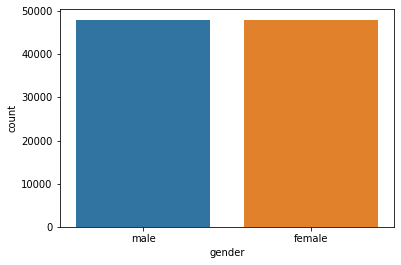

In [79]:
sns.countplot(x ='gender',data= finalblogdf)

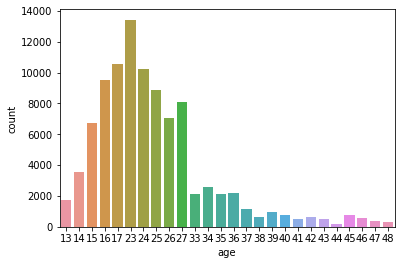

In [80]:
sns.countplot(x ='age',data= finalblogdf)

In [81]:
finalblogdf[finalblogdf['gender'] == 'female'].groupby(['sign']).count()

,id,gender,age,topic,date,text
sign,,,,,,
Aquarius,4000,4000,4000,4000,4000,4000
Aries,4000,4000,4000,4000,4000,4000
Cancer,4000,4000,4000,4000,4000,4000
Capricorn,4000,4000,4000,4000,4000,4000
Gemini,4000,4000,4000,4000,4000,4000
Leo,4000,4000,4000,4000,4000,4000
Libra,4000,4000,4000,4000,4000,4000
Pisces,4000,4000,4000,4000,4000,4000
Sagittarius,4000,4000,4000,4000,4000,4000


In [82]:
finalblogdf[finalblogdf['gender'] == 'male'].groupby(['sign']).count()

,id,gender,age,topic,date,text
sign,,,,,,
Aquarius,4000,4000,4000,4000,4000,4000
Aries,4000,4000,4000,4000,4000,4000
Cancer,4000,4000,4000,4000,4000,4000
Capricorn,4000,4000,4000,4000,4000,4000
Gemini,4000,4000,4000,4000,4000,4000
Leo,4000,4000,4000,4000,4000,4000
Libra,4000,4000,4000,4000,4000,4000
Pisces,4000,4000,4000,4000,4000,4000
Sagittarius,4000,4000,4000,4000,4000,4000


2. Preprocess rows of the “text” column (7.5 points)
a. Remove unwanted characters
b. Convert text to lowercase
c. Remove unwanted spaces
d. Remove stopwords 

**As the blogs are in multiple languages,considering only the blogs which are in english and removing the other blogs**

In [15]:
!pip install langid
import langid

     |████████████████████████████████| 1.9MB 6.4MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941192 sha256=e9147520375c53319f128fd4e7c1fc41c0d515da8d3089b0451080860fa2141a
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [16]:
#checking the language
finalblogdf['text'][1:10].apply(langid.classify)

1211     (en, -6360.137987852097)
1212      (en, -9854.25968503952)
1213     (en, -4804.339765548706)
1214    (en, -1514.0974280834198)
1285    (en, -14017.135055541992)
1286     (en, -731.4950740337372)
1287      (fr, 1.828549861907959)
1288    (en, -1845.2108483314514)
1289      (en, -707.952995300293)
Name: text, dtype: object

In [17]:
# get the language id for each text
ids_langid = finalblogdf['text'].apply(langid.classify)

# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

In [18]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
66
Percent of data in English (estimated):
97.83020833333333


In [19]:
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.text.value_counts()

In [20]:
langs_count

en    93917
zh      218
de      217
tl      204
id      192
      ...  
he        1
ky        1
ar        1
ur        1
oc        1
Name: text, Length: 66, dtype: int64

In [21]:
langs_df[langs_df['text']=='en']

,text
1210,en
1211,en
1212,en
1213,en
1214,en
...,...
674206,en
679492,en
340940,en
20641,en


In [22]:

newdf = langs_df[langs_df['text']=='en'].index

newdf = pd.DataFrame(newdf,columns=['index'])

In [23]:
finalblogdf['index'] =finalblogdf.index

In [ ]:
finalblogdf1 = finalblogdf[finalblogdf['index'].isin(newdf['index'])]
#considerign the index which is present in english language data

In [26]:
finalblogdf1.head(2)

,id,gender,age,topic,sign,date,text,index
1210,3785178,male,17,Student,Virgo,"30,June,2004",I cant believe that im actually making ...,1210
1211,3785178,male,17,Student,Virgo,"06,July,2004",So today was boring. Woke up at 9am...a...,1211


In [27]:
finalblogdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93887 entries, 1210 to 90828
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      93887 non-null  int64 
 1   gender  93887 non-null  object
 2   age     93887 non-null  int64 
 3   topic   93887 non-null  object
 4   sign    93887 non-null  object
 5   date    93887 non-null  object
 6   text    93887 non-null  object
 7   index   93887 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ MB


In [28]:
finalblogdf1.shape

(93887, 8)

**Converting to lowercase first to reduce memory of converting characters to both in upper and lower**

In [25]:
#Convert text to lowercase 

import re
finalblogdf1['text']= finalblogdf1['text'].apply(lambda s: s.lower())
finalblogdf1['topic']= finalblogdf1['topic'].apply(lambda s: s.lower())
finalblogdf1['sign']= finalblogdf1['sign'].apply(lambda s: s.lower())
finalblogdf1['gender']= finalblogdf1['gender'].apply(lambda s: s.lower())
#converting to lower first to reduce the number of operation in pattern matching
finalblogdf1.head()

,id,gender,age,topic,sign,date,text,index
1210,3785178,male,17,student,virgo,"30,June,2004",i cant believe that im actually making ...,1210
1211,3785178,male,17,student,virgo,"06,July,2004",so today was boring. woke up at 9am...a...,1211
1212,3785178,male,17,student,virgo,"04,July,2004",what a shitty 4th of july. i guess it w...,1212
1213,3785178,male,17,student,virgo,"03,July,2004",so today was pretty damn uneventful. i ...,1213
1214,3785178,male,17,student,virgo,"02,July,2004",god damn it! this is another major reas...,1214


In [140]:
specialcharc = '{}[]/?*&^%$#@!~.,_-'

In [141]:
finalblogdf1.text.str.strip(specialcharc).astype(bool).any()

True

In [142]:
finalblogdf1['text'][1:10]

1211           so today was boring. woke up at 9am...a...
1212           what a shitty 4th of july. i guess it w...
1213           so today was pretty damn uneventful. i ...
1214           god damn it! this is another major reas...
1285               in september of 1996, i was backpac...
1286                urllink transcendentalfloss   okay...
1288               'roll down the window and let the w...
1289               i don't have a cell phone, but i wa...
1290               josh marshall made a  urllink  post...
Name: text, dtype: object

Remove unwanted characters

In [26]:
#Remove unwanted characters 
finalblogdf1['text'] = finalblogdf1['text'].apply(lambda s: re.sub('[^a-z ]','',s))

In [27]:
finalblogdf1['text']

1210             i cant believe that im actually making ...
1211             so today was boring woke up at amate br...
1212             what a shitty th of july i guess it was...
1213             so today was pretty damn uneventful i h...
1214             god damn it this is another major reaso...
                                ...                        
674206                changing on a dime   and now the s...
679492       kurtz tells captain willard you have the ri...
340940                      recording is any working day...
20641            sometimes its still sad that someone ju...
287939           today is my birthday  it is a day that ...
Name: text, Length: 93917, dtype: object

#c. Remove unwanted spaces


In [28]:

finalblogdf1['text'] = finalblogdf1['text'].apply(lambda s: s.strip())

In [9]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [30]:
#stop words in english
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
#stop words present in the blogs

  
stop_words = set(stopwords.words('english')) 
#Below stop words are present in the text
finalblogdf1['text'].apply(lambda x: ' '.join([text for text in x.split() if text in stop_words]))

1210      i that the i had of these i was in a to and bu...
1211      so was up at which for me and was then and the...
1212      what a of i it too for the between of i had to...
1213      so was i had to up this to down to my in the i...
1214      it this is why i because if you have a i do an...
                                ...                        
674206                        on a and now the is and no in
679492    you have the to me but you have the to does do...
340940                                        is any during
20641     its that just up on you or that you and or tha...
287939    is my it is a that me with and because i that ...
Name: text, Length: 93917, dtype: object

In [32]:
#forming text after removing stop words from it
finalblogdf1['text'] = finalblogdf1['text'].apply(lambda x: ' '.join([text for text in x.split() if text not in stop_words]))

In [37]:
finalblogdf1['text'][1:10]

1211    today boring woke amate breakfast lyn made ama...
1212    shitty th july guess wasnt badexcept awkwardne...
1213    today pretty damn uneventful wake early mornin...
1214    god damn another major reason hate writing onl...
1285    september backpacking israel landed northern h...
1286    urllink transcendentalfloss okay various forms...
1288    roll window let wind blow back hair bruce spri...
1289    dont cell phone want one dont ipod want one fa...
1290    josh marshall made urllink post blog last nigh...
Name: text, dtype: object

In [10]:
#these are the unwanted words in the text which can be removed aswell
words_to_be_removed = ['a','aa','aaa',	'aaaa',	'aaaaaa',	'aaaaaaaa',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaah','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahahahahahahahahahahahaha',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahahahahahahahahahahahaha','aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh',	'aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh', 'hhhhhhhhhhhhhhhhhhhh','zzz','zzzs','zzzz','zzzzz','zzzzzz','zzzzzzz','zzzzzzzz','zzzzzzzzz','zzzzzzzzzz','zzzzzzzzzzz','zzzzzzzzzzzz','zzzzzzzzzzzzz	zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz','aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh',	'aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh', 'hhhhhhhhhhhhhhhhhhhh',	'aaaaaaaaaaahhhhhhhhhhhh',	'aaaaaaaaaah',	'aaaaaaaaaah',	'aaaaaaaaagh',	'aaaaaaaaagh','aaaaaaaaah',	'aaaaaaaahhhhh',	'aaaaaaa'	,'aaaaaaah'	,'aaaaaaand',	'aaaaaah','aaaaaahhhh','aaaaaahhhhhhh',	'aaaaaahhhhhhhhh',	'aaaaaargh',	'aaaaaaw',	'aaaaaggggggghhhhh',	'aaaaaggggggghhhhh', 'iiiiitttttccccchhhhhh',	'aaaaah','aaaaahhh',	'aaaaahhhh'	,'aaaaahhhhh'	,'aaaaahhhhhh',	'aaaaargh',
'zzzzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzzzzzzzzzzzzzzzhuh','zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzz','zzzzzzzzzzzzz','zzzzzzzzzzzzz','zzzzzzzzzzz','zzzzzzzzzzz','zzzzzzzzi','zzzzzzzzi','zzzzzzwaaah oh','zzzzzzwaaah','zzzzzoh',
'zzzzzoh','zzzzz','zzzzsnbsp','zzzzsnbsp','zzzzs','zzzzs','zzzzs','zzzzaap','zzzupz','zzzhuh','zzt'	,'aaaaa','aaaaaaaaaa','aaaaaaaaaaaaaaaa',	'aaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhh','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaagh','aaaaaaaaaaaaaaaaaaaaaaaaaargh','aaaaaaaaaaaaaaaaaaaaaaaaahhhhhhhh','aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhh',
'aaaaaaaaaaaaaaaaaahahhahahahahahhahahahahahahha',	'aaaaaaaaaaaaaaaaargh','aaaaaaaaaaaaaaahhh','aaaaaaaaaaaaaah','aaaaaaaaaaaaaahh','aaaaaaaaaaaaaahhhhhhhhhhhhh','aaaaaaaaaaaaah','aaaaaaaaaaaaaw','aaaaaaaaaaaack','aaaaaaaaaaaahahaha','aaaaaaaaaaaahhhhhhhhh','aaaaaaaaaaaammmmmmmmmmmmmmmmm','aaaaaaaaaaahhahha','aaaaaaaaaaahhhhhhhhh','aaaaaaaaaaahhhhhhhhhhhhhhh',	'aaaaaaaaaaahhhhhhhhhhhhhhhhhhh','aaaaaaaaaaahhhhhhhhhhhhhhhhhhhhwhat','aaaaaaaaaaargh','aaaaaaaaaaauuugh','aaaaaaaaaahahahahahahahahahaha','aaaaaaaaaahhhhhhhhhh',
'aaaaaaaaaahhhhhhhhhhhhh','aaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhh','aaaaaaaaaggggghhhhh','aaaaaaaaahhhhh','aaaaaaaaahhhhhhh','aaaaaaaaall','aaaaaaaaanyway','aaaaaaaaarg','aaaaaaaaargh','aaaaaaaages','aaaaaaaah','aaaaaaaahhh','aaaaaaaahhhhhhhhhhhhhhh','aaaaaaaahhhhhhhhhhhhhhhhhhhhhhrrrrrrrrrrrrrrrrrrrrrrr','aaaaaaaallllll','aaaaaaaand','aaaaaaaarrrrrrrrggggggggghhhhh','aaaaaaaarrrrrrrrrrrrrgggggggggggghhhhhhhhhhhh','aaaaaaaauuuuuuggggggghhhhhhhh','aaaaaaaawwwwwwwyeeeehhhhh','aaaaaaaggghhh','aaaaaaaggghhhhh','aaaaaaahhhhh','aaaaaaahhhhhhdorable','aaaaaaahhhhhhh','aaaaaaahhhhhhhhhh','aaaaaaahhhhhhhhhhh','aaaaaaahhhhhhhhhhhhhhhhhh','aaaaaaall','aaaaaaargh','aaaaaaarrrrrrrgggggh','aaaaaaarrrrrrrrrrrrrrrrghhhhhhhhhhhhhhh',
'aaaaaaawwww','aaaaaackkkk','aaaaaahahahahhahaha','aaaaaahahha','aaaaaahh','aaaaaahhh','aaaaaahhhare','aaaaaahhhhh','aaaaaahhhhhhhh','aaaaaahhhhhhhhhhhhh','aaaaaahhhhhhhhwell',
'aaaaaalllll','aaaaaalllllllll','aaaaaalways','aaaaaargghh','aaaaaarhgh','aaaaaarrrggghhh','aaaaaarrrrghh','aaaaaarrrrrrgggggggghhhhhhhhh','aaaaaarrrrrrrghhhhhhhhhh','aaaaack','aaaaagh',
'aaaaahahahaha','aaaaahh','aaaaahhhhhhhhhh','aaaaahhhhhhhhhhhh','aaaaahhhhhhhhhhhhhhhhhhhh','aaaaahhhhhhhi','aaaaaieeeeeeee','aaaaaing','aaaaall','aaaaalleluia','aaaaam','aaaaand','aaaaannnnnddddd',
'aaaaanyway','aaaaarggggghhhhhhhh','aaaaargh','aaaaarrgggghhhh','aaaaarrrggggh','aaaaarrrrrgggghhhhh','aaaaasmith','aaaaaw','aaaaawwwwww','aaaaccchoooo','aaaack',
'aaaafinallyafter','aaaages','aaaagggghhhhhhhhhhh','aaaagh','aaaah','aaaahhh','aaaahhhh','aaaahhhhh','aaaahhhhhh','aaaahhhhhhh','aaaahhhhi','aaaahhhuuhhhh','aaaahing','aaaall','aaaand','aaaandhmmm','aaaa',	'aaaa','aaaarg','aaaargggggggghhhh','aaaarggggggghhhhhhhh',
'aaaargh','aaaarghhno','aaaarrrgggghhhh','aaaarrrgghhhh','aaaarrrghh','aaaarrrrgggg','aaaarrrrgggghhhh','aaaarrrrrrggghh','aaaathmm','aaaawwwjke','aaaawwww','aaabsolutely','aaagggghhhh','aaaggghhh','aaagh','aaah','aaahahahahahahaha','aaahh','aaahha','aaahhh','aaahhhh','aaahhhhh','aaahhhhhhhh','aaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhh','aaahp',
'aaahs','aaaiiieeeeeeee','aaalbumen','aaallll','aaalllll','aaa','aaanand','aaand','aaanimaaaniacs','aaannddd','aaannnd','aaannndd','aaannnnd','aaannnndchas',	
'aaannnywayz','aaanyhoo','aaa','aaappp','aaarg','aaargghhhhh','aaargh','aaaroadtrip','aaarrggghhh','aaarrgghh','aaarrrggghh','aaarrrggghhhhh','aaarrrgghhhhhh','aaarrrrgggghhh','aaas','aaass','aaaugh','aaaw','aaawww','aaawwwww','aab']

In [ ]:
finalblogdf1['text'] = finalblogdf1['text'].apply(lambda x: ' '.join([text for text in x.split() if text not in words_to_be_removed]))

In [198]:
#finalblogdf1['text'] = finalblogdf1['text'].apply(lambda x: ' '.join([text for text in x.split() if text not in stop_words]))

In [38]:
finalblogdf1['text']

1210      cant believe im actually making another online...
1211      today boring woke amate breakfast lyn made ama...
1212      shitty th july guess wasnt badexcept awkwardne...
1213      today pretty damn uneventful wake early mornin...
1214      god damn another major reason hate writing onl...
                                ...                        
114177    seen teeshirt work yesterday shirt designed di...
194739    finally watched opening ceremony greek family ...
12167     im always looking fresh new jives get party st...
446696    complete bubbles click popup ad times get spon...
90828     aware went play trivia last night raven well t...
Name: text, Length: 93887, dtype: object

In [236]:
# #using stemming to remove inflected words
# #Function to Stem words
# def get_stemmed_text(corpus):
#     stemmer = PorterStemmer()
#     return [' '.join([stemmer.stem(word) for word in text.split()]) for text in corpus]

In [43]:
# get_stemmed_text(finalblogdf1['text'][1:2])

In [237]:
# finalblogdf1['text'] = get_stemmed_text(finalblogdf1['text'])

In [34]:
finalblogdf1.head()

,id,gender,age,topic,sign,date,text,index
1210,3785178,male,17,student,virgo,"30,June,2004",cant believe im actually making another online...,1210
1211,3785178,male,17,student,virgo,"06,July,2004",today boring woke amate breakfast lyn made ama...,1211
1212,3785178,male,17,student,virgo,"04,July,2004",shitty th july guess wasnt badexcept awkwardne...,1212
1213,3785178,male,17,student,virgo,"03,July,2004",today pretty damn uneventful wake early mornin...,1213
1214,3785178,male,17,student,virgo,"02,July,2004",god damn another major reason hate writing onl...,1214


In [239]:
finalblogdf1.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
index     0
dtype: int64

As we want to make this into a multi-label classification problem, you are required to merge
all the label columns together, so that we have all the labels together for a particular sentence

a. Label columns to merge: “gender”, “age”, “topic”, “sign”


In [35]:
#removing unwanted columns


In [36]:
newfinaldf.head(2)

,gender,age,topic,sign,text
1210,male,17,student,virgo,cant believe im actually making another online...
1211,male,17,student,virgo,today boring woke amate breakfast lyn made ama...


In [37]:
newfinaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93917 entries, 1210 to 287939
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  93917 non-null  object
 1   age     93917 non-null  int64 
 2   topic   93917 non-null  object
 3   sign    93917 non-null  object
 4   text    93917 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


In [42]:
#newfinaldf['age'] = newfinaldf['age'].astype('str')

In [65]:
# newfinaldf['labels'] = newfinaldf[newfinaldf.columns[0:4]].apply(
#     lambda x: ','.join(x.astype(str)), axis=1
# )

In [38]:
#mergiing gender,topic,sign,age together
newfinaldf['labels'] = newfinaldf[newfinaldf.columns[0:4]].apply(
    lambda x: ','.join(x.astype(str)), axis=1
)

In [189]:
# list=[]                              # 2D Matrix having list of list
# for i in range(newfinaldf.shape[0]):
#     labels=[]                          # 1D list of 'gender', 'age', 'topic', 'sign'
#     for j in range(newfinaldf.shape[1]):
#         # labels.append(newfinaldf.iloc[i][j])
#     list.append(labels)

In [43]:
#newfinaldf['labels'] = [[a,b,c,d] for a,b,c,d in zip(newfinaldf['gender'], newfinaldf['age'],newfinaldf['topic'],newfinaldf['sign'])]


In [44]:
#the data after merging 
newfinaldf.head(1)

,gender,age,topic,sign,text,labels
1210,male,17,student,virgo,cant believe im actually making another online...,"[male, 17, student, virgo]"


In [244]:
newfinaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93862 entries, 1210 to 438548
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  93862 non-null  object
 1   age     93862 non-null  object
 2   topic   93862 non-null  object
 3   sign    93862 non-null  object
 4   text    93862 non-null  object
 5   labels  93862 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


In [39]:
#dropping the merged columns
newfinaldf1 = newfinaldf.drop(['gender','age','topic','sign'],axis =1)

B, After completing the previous step, there should be only two columns in your data
frame i.e. “text” and “labels” 

In [40]:
newfinaldf1 = newfinaldf1.reset_index()

In [41]:
newfinaldf1.drop(['index'],axis = 1,inplace = True)

In [42]:
#the data after merging columns and removing the merged columns
newfinaldf1.head(1)

,text,labels
0,cant believe im actually making another online...,"male,17,student,virgo"


4. Separate features and labels, and split the data into training and testing (5 points)

In [43]:
#creating text as feature
X = newfinaldf1['text']

In [44]:
#creting labels as label
y = newfinaldf1['labels']

In [45]:
#initializing multilablebinarizer for encondign multiple labels
label = MultiLabelBinarizer()

In [46]:
#forming train and test data.consider 25% for testing
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size =0.25,random_state = 42 )

In [47]:
X_train.shape

(70437,)

In [48]:
X_train[1:2]

79163    leslie born june live one joke family like col...
Name: text, dtype: object

In [50]:
#viewing train and test data
X_test.shape ,X_test[1:2]

((23480,), 66154    first interview went well think may get job go...
 Name: text, dtype: object)

5. Vectorize the features (5 points)
a. Create a Bag of Words using count vectorizer
i. Use ngram_range=(1, 2)
ii. Vectorize training and testing features

In [51]:
#initializing countvectorizer with ngrams
vectorizer = CountVectorizer(ngram_range = (1,2))

In [52]:

X_train = vectorizer.fit_transform(X_train)
#fit_transform train data

In [53]:
X_train

<70437x4047060 sparse matrix of type '<class 'numpy.int64'>'
	with 12420885 stored elements in Compressed Sparse Row format>

In [54]:
X_test = vectorizer.transform(X_test)
#transform test data

In [55]:
X_test

<23480x4047060 sparse matrix of type '<class 'numpy.int64'>'
	with 3120275 stored elements in Compressed Sparse Row format>

In [56]:
#viewing the voaculary
vectorizer.vocabulary_

{'friday': 1302681,
 'night': 2385699,
 'believe': 312658,
 'well': 3877270,
 'actually': 27848,
 'might': 2217536,
 'saturday': 3000326,
 'cant': 498030,
 'remember': 2880837,
 'let': 1965878,
 'check': 562630,
 'ok': 2451805,
 'much': 2300308,
 'going': 1418653,
 'today': 3589255,
 'chris': 587795,
 'erik': 1072641,
 'continued': 705232,
 'search': 3042533,
 'wesley': 3892946,
 'willis': 3918433,
 'cds': 533015,
 'got': 1440252,
 'copy': 720830,
 'eriks': 1072832,
 'bands': 266602,
 'new': 2367930,
 'ep': 1067936,
 'went': 3886099,
 'dodgeball': 930938,
 'wasnt': 3834094,
 'expecting': 1129127,
 'felt': 1198078,
 'justified': 1837408,
 'decision': 843754,
 'spend': 3275682,
 'saw': 3004628,
 'megapixel': 2187036,
 'camera': 489145,
 'best': 323842,
 'buy': 466352,
 'struck': 3362177,
 'good': 1429565,
 'enough': 1057266,
 'four': 1287465,
 'megapixels': 2187047,
 'pretty': 2718214,
 'dont': 941988,
 'particularly': 2545873,
 'care': 507766,
 'technology': 3472106,
 'specifics': 32722

**b. Print the term-document matrix**

Printing first few records as to array consumes more memory and session crashes

In [57]:
#train DTM
pd.DataFrame(X_train[1:5].toarray(), columns = vectorizer.get_feature_names())

,aa,aa aa,aa aaand,aa advert,aa alexisonfire,aa apparently,aa assertive,aa back,aa bateries,aa batteries,aa bra,aa browsing,aa bukannya,aa business,aa car,aa certain,aa cruise,aa cutest,aa diamond,aa draft,aa end,aa favoring,aa field,aa gai,aa gaya,aa gaye,aa giving,aa good,aa got,aa grandma,aa group,aa guns,aa ha,aa hahahai,aa hey,aa ive,aa kk,aa last,aa lava,aa lazy,...,zzzzzzz time,zzzzzzzz,zzzzzzzzdamni,zzzzzzzzdamni hate,zzzzzzzzz,zzzzzzzzz gd,zzzzzzzzz good,zzzzzzzzzz,zzzzzzzzzz yeah,zzzzzzzzzzz,zzzzzzzzzzz goto,zzzzzzzzzzz listen,zzzzzzzzzzzespecially,zzzzzzzzzzzespecially wave,zzzzzzzzzzzz,zzzzzzzzzzzz boring,zzzzzzzzzzzz im,zzzzzzzzzzzzz,zzzzzzzzzzzzz radom,zzzzzzzzzzzzz still,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz hehehhehez,zzzzzzzzzzzzzzzzsuper,zzzzzzzzzzzzzzzzsuper sleepy,zzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzz sleeping,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz squid,zzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz gd,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz ciao,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz second,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz woke,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
#test DTM
pd.DataFrame(X_test[1:5].toarray(), columns = vectorizer.get_feature_names())

,aa,aa aa,aa aaand,aa advert,aa alexisonfire,aa apparently,aa assertive,aa back,aa bateries,aa batteries,aa bra,aa browsing,aa bukannya,aa business,aa car,aa certain,aa cruise,aa cutest,aa diamond,aa draft,aa end,aa favoring,aa field,aa gai,aa gaya,aa gaye,aa giving,aa good,aa got,aa grandma,aa group,aa guns,aa ha,aa hahahai,aa hey,aa ive,aa kk,aa last,aa lava,aa lazy,...,zzzzzzz time,zzzzzzzz,zzzzzzzzdamni,zzzzzzzzdamni hate,zzzzzzzzz,zzzzzzzzz gd,zzzzzzzzz good,zzzzzzzzzz,zzzzzzzzzz yeah,zzzzzzzzzzz,zzzzzzzzzzz goto,zzzzzzzzzzz listen,zzzzzzzzzzzespecially,zzzzzzzzzzzespecially wave,zzzzzzzzzzzz,zzzzzzzzzzzz boring,zzzzzzzzzzzz im,zzzzzzzzzzzzz,zzzzzzzzzzzzz radom,zzzzzzzzzzzzz still,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzz hehehhehez,zzzzzzzzzzzzzzzzsuper,zzzzzzzzzzzzzzzzsuper sleepy,zzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzz sleeping,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz squid,zzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzz gd,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz ciao,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz second,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz woke,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Create a dictionary to get the count of every label i.e. the key will be label name and value will
be the total count of the label. Check below image for reference (5 points)

In [59]:
newfinaldfdict = newfinaldf[['gender', 'age', 'topic', 'sign']]

In [60]:
newfinaldfdict.head(5)

,gender,age,topic,sign
1210,male,17,student,virgo
1211,male,17,student,virgo
1212,male,17,student,virgo
1213,male,17,student,virgo
1214,male,17,student,virgo


In [53]:
newfinaldfdict.isna().sum()

gender    0
age       0
topic     0
sign      0
dtype: int64

In [54]:
newfinaldfdict['age'] = newfinaldfdict['age'].astype('str')

In [215]:
#creating keys as label and count of lables as values in dictionary
keys=[] 
values=[] 

for i in range(newfinaldfdict.shape[1]): # iterate through all the colummns        
    for j in range(newfinaldfdict.iloc[:,i].value_counts().shape[0]): # iterate through all the rows of value_counts of that column
        keys.append(newfinaldfdict.iloc[:,i].value_counts().index[j])         
        values.append(newfinaldfdict.iloc[:,i].value_counts().iloc[j])

In [218]:
#viewing keys
keys[1:10]

['female', '23', '17', '24', '16', '25', '27', '26', '15']

In [219]:
#viewing values
values[1:10]

[46921, 12931, 10320, 9991, 9304, 8715, 7993, 6841, 6575]

In [220]:
# dict.clear


In [221]:
#printing the sample dictionary
dict(zip(keys,values))

{'13': 1683,
 '14': 3485,
 '15': 6575,
 '16': 9304,
 '17': 10320,
 '23': 12931,
 '24': 9991,
 '25': 8715,
 '26': 6841,
 '27': 7993,
 '33': 2062,
 '34': 2553,
 '35': 2124,
 '36': 2147,
 '37': 1141,
 '38': 655,
 '39': 926,
 '40': 773,
 '41': 484,
 '42': 638,
 '43': 473,
 '44': 194,
 '45': 727,
 '46': 543,
 '47': 355,
 '48': 284,
 'accounting': 688,
 'advertising': 754,
 'agriculture': 137,
 'aquarius': 7873,
 'architecture': 159,
 'aries': 7834,
 'arts': 4550,
 'automotive': 56,
 'banking': 592,
 'biotech': 449,
 'businessservices': 618,
 'cancer': 7846,
 'capricorn': 7843,
 'chemicals': 440,
 'communications-media': 2433,
 'construction': 171,
 'consulting': 735,
 'education': 4741,
 'engineering': 1324,
 'environment': 44,
 'fashion': 613,
 'female': 46921,
 'gemini': 7851,
 'government': 1025,
 'humanresources': 230,
 'indunk': 34505,
 'internet': 2794,
 'investmentbanking': 162,
 'law': 1261,
 'lawenforcement-security': 212,
 'leo': 7803,
 'libra': 7829,
 'male': 46996,
 'manufacturi

In [61]:
#printing the y_train
y_train

6159         male,16,student,taurus
79163       female,14,indunk,gemini
93859       female,16,student,aries
80808    female,23,education,gemini
87972       female,34,indunk,cancer
                    ...            
6265         male,16,student,taurus
54886      female,17,indunk,scorpio
76820          female,25,indunk,leo
860        male,33,non-profit,virgo
15795      male,27,banking,aquarius
Name: labels, Length: 70437, dtype: object

Converting y_train and y_test to dictionary as multi label binarizer accepts dictionary ,if dictionary is not passed, binarizer performs transformation for each literal which is inappropriate

In [62]:
y_train1 = [set(i.split(',')) for i in y_train]
y_test1 = [set(i.split(',')) for i in y_test]

In [63]:
#training labels in dictionary form
y_train1[1:10]

[{'14', 'female', 'gemini', 'indunk'},
 {'16', 'aries', 'female', 'student'},
 {'23', 'education', 'female', 'gemini'},
 {'34', 'cancer', 'female', 'indunk'},
 {'16', 'aries', 'female', 'student'},
 {'17', 'arts', 'female', 'leo'},
 {'42', 'capricorn', 'indunk', 'male'},
 {'16', 'aries', 'male', 'student'},
 {'24', 'female', 'indunk', 'taurus'}]

In [226]:
#testing labels in dictionary form
y_test1[1:10]

[{'27', 'aquarius', 'female', 'student'},
 {'14', 'female', 'indunk', 'leo'},
 {'16', 'chemicals', 'female', 'taurus'},
 {'13', 'aries', 'male', 'student'},
 {'27', 'male', 'pisces', 'technology'},
 {'34', 'aries', 'indunk', 'male'},
 {'24', 'libra', 'male', 'museums-libraries'},
 {'25', 'indunk', 'leo', 'male'},
 {'23', 'male', 'manufacturing', 'scorpio'}]

7. Transform the labels - (7.5 points)
As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn
a. Convert your train and test labels using MultiLabelBinarizer

In [71]:
#fit_transforming labels using multiplelabelbinarizer
y_trainmlb = label.fit_transform(y_train1)

In [72]:
y_testmlb = label.transform(y_test1)

In [188]:
# y_train = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in y_train]]
# y_train = MLB.fit_transform(y_train)
# Y_test = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in y_test]]
# # y_test_trans = MLB.transform(y_test) 

In [73]:
#converted lables
y_testmlb[1],  y_trainmlb[1]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [74]:
#classes present 
label.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'accounting', 'advertising', 'agriculture',
       'aquarius', 'architecture', 'aries', 'arts', 'automotive',
       'banking', 'biotech', 'businessservices', 'cancer', 'capricorn',
       'chemicals', 'communications-media', 'construction', 'consulting',
       'education', 'engineering', 'environment', 'fashion', 'female',
       'gemini', 'government', 'humanresources', 'indunk', 'internet',
       'investmentbanking', 'law', 'lawenforcement-security', 'leo',
       'libra', 'male', 'manufacturing', 'maritime', 'marketing',
       'military', 'museums-libraries', 'non-profit', 'pisces',
       'publishing', 'realestate', 'religion', 'sagittarius', 'science',
       'scorpio', 'sports-recreation', 'student', 'taurus', 'technology',
       'telecommunications', 'tourism', 'transportation', 'virgo'],
      dtype

In [75]:
#total number of classes
len(label.classes_)

80

In [76]:
#checking labels by inverse transforming
label.inverse_transform(y_trainmlb)[1]

('14', 'female', 'gemini', 'indunk')

In [81]:
#initializing logistic regression and linear svc 
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
svc = LinearSVC()




In [207]:

# def j_score(y_true,y_pred):
#   jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
#   return jaccard.mean()*100


In [ ]:
# j_score(y_testmlb,y_pred)

8. Choose a classifier - (5 points)
In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression. It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.
a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on
every label
b. As One-vs-Rest approach might not have been discussed in the sessions, we are
providing you the code for that


In [82]:
#using oneVsRestClassifier for multi label classification
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_trainmlb)
  

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [83]:
#predicnt the classes
y_pred = clf.predict(X_test)
y_proba_ovr = clf.predict_proba(X_test)
 

9. Fit the classifier, make predictions and get the accuracy (5 points)
a. Print the following
i. Accuracy score
ii. F1 score
iii. Average precision score
iv. Average recall score


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_pred, y_testmlb)
#accuracy is 

0.044165247018739355

In [85]:
print(classification_report(y_pred, y_testmlb))

              precision    recall  f1-score   support

           0       0.11      0.51      0.18        94
           1       0.12      0.48      0.19       207
           2       0.16      0.58      0.26       476
           3       0.25      0.70      0.37       809
           4       0.19      0.61      0.29       770
           5       0.17      0.57      0.26       931
           6       0.10      0.50      0.17       503
           7       0.13      0.66      0.22       455
           8       0.09      0.61      0.15       249
           9       0.14      0.56      0.22       481
          10       0.08      0.62      0.14        64
          11       0.12      0.62      0.20       121
          12       0.10      0.67      0.18        85
          13       0.06      0.52      0.10        58
          14       0.08      0.67      0.14        33
          15       0.04      0.50      0.07        12
          16       0.06      0.42      0.11        33
          17       0.20    

From the classification report we could see that precision score is lesser compared to recall. Unable to predict all classes with good accuracy

In [88]:
#using micro, macro and weighted averaging score 
print('f1 score',f1_score(y_testmlb,y_pred, average='micro'))
print('Average Precision Score: ',average_precision_score(y_testmlb,y_pred, average='macro'))
print('Average Recall Score: ',recall_score(y_testmlb,y_pred, average='weighted'))

f1 score 0.39421061534275187
Average Precision Score:  0.09924346861808644
Average Recall Score:  0.2853598807495741


10. Print true label and predicted label for any five examples (7.5 points)


In [92]:
#printing the first 10 labels
predicted = y_pred[0:10]
actual = y_testmlb[0:10]

In [90]:
predicted

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0

In [ ]:
actual

In [93]:
actualtransformed = label.inverse_transform(actual)
actualtransformed

[('25', 'aries', 'male', 'student'),
 ('27', 'aquarius', 'female', 'student'),
 ('16', 'female', 'leo', 'student'),
 ('24', 'female', 'student', 'taurus'),
 ('24', 'aries', 'male', 'student'),
 ('24', 'education', 'male', 'pisces'),
 ('24', 'aries', 'government', 'male'),
 ('17', 'libra', 'male', 'student'),
 ('27', 'education', 'leo', 'male'),
 ('25', 'education', 'male', 'scorpio')]

In [94]:
predictedtransformed = label.inverse_transform(predicted)
predictedtransformed

[('16', 'male'),
 ('34', 'female'),
 ('15', 'female', 'student'),
 ('indunk', 'male'),
 ('male', 'student'),
 ('female', 'indunk'),
 ('male',),
 ('female',),
 ('male',),
 ('male',)]

Model is unable to predict all the lables.

In [ ]:
# clf1 = OneVsRestClassifier(svc)
# clf1.fit(X_train, y_trainmlb)

In [ ]:
# y_pred1 = clf1.predict(X_test)


In [ ]:
# print(classification_report(y_pred, y_testmlb))

In [ ]:
# accuracy_score(y_pred1,y_testmlb)

In [ ]:
#considering counter vectorizer with ngrams

USe case 2: including stop_words and min_df in countvectorizer

In [78]:
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X, y, test_size =0.25,random_state = 42 )

In [79]:
vectorizer = CountVectorizer(ngram_range=(1,2)  ,stop_words = 'english',min_df = 2)


In [80]:

X_train1 = vectorizer.fit_transform(X_train1)

In [105]:
pd.DataFrame(X_train1[1:2].toarray(), columns = vectorizer.get_feature_names())

,aa,aa batteries,aa car,aa gaye,aa group,aa guns,aa meeting,aaa,aaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahahahahahahahahahahahaha,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahahahahahahahahahahahaha fat,aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh,aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh hhhhhhhhhhhhhhhhhhhh,aaaaaaaaaaahhhhhhhhhhhh,aaaaaaaaagh,aaaaaaaaagh really,aaaaaaaaah,aaaaaaaahhhhh,aaaaaaaand,aaaaaaah,aaaaaah,aaaaaahh,aaaaaahhhhh,aaaaaahhhhhhhhh,aaaaaaw,aaaaaggggggghhhhh,aaaaaggggggghhhhh iiiiitttttccccchhhhhh,aaaaagh,aaaaah,aaaaalrightyyyyy,aaaaand,aaaaargh,aaaack,aaaah,aaaahhh,aaaahhhh,aaaand,...,zul,zuls,zulu,zulu warriors,zuluchim,zuma,zumiez,zuo,zur,zuri,zurich,zurich airport,zurich meet,zurich noticed,zwan,zwelleger,zwelleger really,zx,zy,zydrunas,zydrunas ilgauskas,zz,zz packer,zzt,zzt bzzizle,zzz,zzzs,zzzz,zzzzs,zzzzz,zzzzzs,zzzzzz,zzzzzzz,zzzzzzzz,zzzzzzzzz,zzzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
X_test1 = vectorizer.transform(X_test1)

In [83]:

label = MultiLabelBinarizer()

In [84]:
y_trainmlb = label.fit_transform(y_train1)

In [85]:
y_testmlb = label.transform(y_test1)

In [86]:
y_testmlb[1:2], y_trainmlb[1:2]

(array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [88]:

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
svc = LinearSVC()




In [89]:
clf2 = OneVsRestClassifier(lr)
clf2.fit(X_train1, y_trainmlb)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [90]:
y_pred2 = clf2.predict(X_test1)


In [94]:
accuracy_score(y_testmlb, y_pred2)


0.054638406646075194

In [97]:
print(classification_report(y_testmlb, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.15      0.24       318
           1       0.50      0.17      0.26       667
           2       0.53      0.18      0.27      1347
           3       0.68      0.28      0.40      1775
           4       0.59      0.22      0.32      2073
           5       0.53      0.18      0.27      2548
           6       0.41      0.11      0.17      2051
           7       0.57      0.18      0.27      1778
           8       0.47      0.11      0.18      1358
           9       0.46      0.16      0.23      1618
          10       0.48      0.09      0.15       388
          11       0.72      0.18      0.29       517
          12       0.71      0.18      0.29       459
          13       0.46      0.09      0.15       461
          14       0.48      0.10      0.17       200
          15       0.78      0.11      0.20       123
          16       0.42      0.11      0.18       169
          17       0.68    

With the classification report we could observe that model is able to predict most of the classes with better accuracy by using min_df and stop_words

In [98]:

print('f1 score',f1_score(y_testmlb,y_pred2, average='micro'))
print('Average Precision Score: ',average_precision_score(y_testmlb,y_pred2, average='macro'))
print('Average Recall Score: ',recall_score(y_testmlb,y_pred2, average='weighted'))

f1 score 0.4102976811645472
Average Precision Score:  0.10648358904230164
Average Recall Score:  0.3088321439982959


In [101]:
predicted = y_pred2[0:15]
actual = y_test1[0:15]

In [102]:
predictedtransformed = label.inverse_transform(predicted)
predictedtransformed

[('female',),
 ('male',),
 ('female', 'indunk'),
 ('female',),
 ('female',),
 ('indunk', 'male'),
 ('male',),
 ('female', 'student'),
 ('24', 'female'),
 ('male',),
 ('aries', 'female', 'student'),
 ('indunk', 'male'),
 ('25', 'gemini', 'male'),
 ('25', 'gemini', 'male', 'tourism'),
 ('23', 'indunk', 'male')]

In [104]:
actualtransformed = label.inverse_transform(actual)
actualtransformed

[('23', 'female', 'libra', 'tourism'),
 ('25', 'male', 'sagittarius', 'science'),
 ('23', 'female', 'student', 'virgo'),
 ('41', 'male', 'taurus', 'technology'),
 ('44', 'aquarius', 'education', 'female'),
 ('26', 'aries', 'male', 'non-profit'),
 ('17', 'aries', 'education', 'female'),
 ('17', 'capricorn', 'female', 'student'),
 ('25', 'aquarius', 'arts', 'female'),
 ('27', 'indunk', 'leo', 'male'),
 ('16', 'aries', 'female', 'student'),
 ('16', 'male', 'scorpio', 'student'),
 ('23', 'leo', 'male', 'tourism'),
 ('23', 'leo', 'male', 'tourism'),
 ('23', 'accounting', 'cancer', 'male')]

*With additional parameters accuracy increased by 1 but still model is unable to predict the classes correctly*

Use case 3:USing fewer data to further check for improvement in accuracy

In [95]:

# blogfdf1 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Virgo') ].head(400)
# blogfdf2 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Taurus') ].sample(400)
# blogfdf3 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Scorpio') ].tail(400)
# blogfdf4 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Sagittarius') ].sample(400)
# blogfdf5 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Aquarius') ].head(400)
# blogfdf6 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Pisces') ].tail(400)
# blogfdf7 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Libra') ].sample(400)
# blogfdf8 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Leo') ].head(400)
# blogfdf9 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Gemini') ].sample(400)
# blogfdf10 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Capricorn') ].tail(400)
# blogfdf11 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Cancer') ].sample(400)
# blogfdf12 = blogdf.loc[(blogdf['gender'] == 'female') & (blogdf['sign'] == 'Aries') ].sample(400)

# blogdf1 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Virgo') ].head(400)
# blogdf2 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Taurus') ].tail(400)
# blogdf3 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Scorpio') ].sample(400)
# blogdf4 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Sagittarius') ].head(400)
# blogdf5 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Aquarius') ].tail(400)
# blogdf6 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Pisces') ].sample(400)
# blogdf7 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Libra') ].sample(400)
# blogdf8 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Leo') ].head(400)
# blogdf9 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Gemini') ].tail(400)
# blogdf10 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Capricorn') ].sample(400)
# blogdf11 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Cancer') ].head(400)
# blogdf12 = blogdf.loc[(blogdf['gender'] == 'male') & (blogdf['sign'] == 'Aries') ].sample(400)



In [96]:
# reduceblogdf = pd.concat([blogdf1,blogdf2,blogdf3,blogdf4,blogdf5,blogdf6,blogdf7,blogdf8,blogdf9,blogdf10,blogdf11,blogdf12,blogfdf1,blogfdf2,
#                           blogfdf3,blogfdf4,blogfdf5,blogfdf6,blogfdf7,blogfdf8,blogfdf9,blogfdf10,blogfdf11,blogfdf12])

In [3]:
#taking random samples
reduceblogdf = blogdf.head(10000)

In [4]:
reduceblogdf.shape

(10000, 7)

*performing all the operations as use case 1*

In [5]:
import re
reduceblogdf['text']= reduceblogdf['text'].apply(lambda s: s.lower())
reduceblogdf['topic']= reduceblogdf['topic'].apply(lambda s: s.lower())
reduceblogdf['sign']= reduceblogdf['sign'].apply(lambda s: s.lower())
reduceblogdf['gender']= reduceblogdf['gender'].apply(lambda s: s.lower())
#converting to lower first to reduce the number of operation in pattern matching
reduceblogdf.head()


,id,gender,age,topic,sign,date,text
0,2059027,male,15,student,leo,"14,May,2004","info has been found (+/- 100 pages,..."
1,2059027,male,15,student,leo,"13,May,2004",these are the team members: drewe...
2,2059027,male,15,student,leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,student,leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,investmentbanking,aquarius,"11,June,2004",thanks to yahoo!'s toolbar i can ...


In [6]:
words_to_be_removed = ['a','aa','aaa',	'aaaa',	'aaaaaa',	'aaaaaaaa',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaah','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahahahahahahahahahahahaha',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahahahahahahahahahahahaha','aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh',	'aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh', 'hhhhhhhhhhhhhhhhhhhh','zzz','zzzs','zzzz','zzzzz','zzzzzz','zzzzzzz','zzzzzzzz','zzzzzzzzz','zzzzzzzzzz','zzzzzzzzzzz','zzzzzzzzzzzz','zzzzzzzzzzzzz	zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz','aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh',	'aaaaaaaaaaaaaaaaaaaarrrrrrrrrrgggggggggghh', 'hhhhhhhhhhhhhhhhhhhh',	'aaaaaaaaaaahhhhhhhhhhhh',	'aaaaaaaaaah',	'aaaaaaaaaah',	'aaaaaaaaagh',	'aaaaaaaaagh','aaaaaaaaah',	'aaaaaaaahhhhh',	'aaaaaaa'	,'aaaaaaah'	,'aaaaaaand',	'aaaaaah','aaaaaahhhh','aaaaaahhhhhhh',	'aaaaaahhhhhhhhh',	'aaaaaargh',	'aaaaaaw',	'aaaaaggggggghhhhh',	'aaaaaggggggghhhhh', 'iiiiitttttccccchhhhhh',	'aaaaah','aaaaahhh',	'aaaaahhhh'	,'aaaaahhhhh'	,'aaaaahhhhhh',	'aaaaargh',
'zzzzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzzzzzzzzzzzzzzzhuh','zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzz','zzzzzzzzzzzzz','zzzzzzzzzzzzz','zzzzzzzzzzz','zzzzzzzzzzz','zzzzzzzzi','zzzzzzzzi','zzzzzzwaaah oh','zzzzzzwaaah','zzzzzoh',
'zzzzzoh','zzzzz','zzzzsnbsp','zzzzsnbsp','zzzzs','zzzzs','zzzzs','zzzzaap','zzzupz','zzzhuh','zzt'	,'aaaaa','aaaaaaaaaa','aaaaaaaaaaaaaaaa',	'aaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhh','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaagh','aaaaaaaaaaaaaaaaaaaaaaaaaargh','aaaaaaaaaaaaaaaaaaaaaaaaahhhhhhhh','aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhh',
'aaaaaaaaaaaaaaaaaahahhahahahahahhahahahahahahha',	'aaaaaaaaaaaaaaaaargh','aaaaaaaaaaaaaaahhh','aaaaaaaaaaaaaah','aaaaaaaaaaaaaahh','aaaaaaaaaaaaaahhhhhhhhhhhhh','aaaaaaaaaaaaah','aaaaaaaaaaaaaw','aaaaaaaaaaaack','aaaaaaaaaaaahahaha','aaaaaaaaaaaahhhhhhhhh','aaaaaaaaaaaammmmmmmmmmmmmmmmm','aaaaaaaaaaahhahha','aaaaaaaaaaahhhhhhhhh','aaaaaaaaaaahhhhhhhhhhhhhhh',	'aaaaaaaaaaahhhhhhhhhhhhhhhhhhh','aaaaaaaaaaahhhhhhhhhhhhhhhhhhhhwhat','aaaaaaaaaaargh','aaaaaaaaaaauuugh','aaaaaaaaaahahahahahahahahahaha','aaaaaaaaaahhhhhhhhhh',
'aaaaaaaaaahhhhhhhhhhhhh','aaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhh','aaaaaaaaaggggghhhhh','aaaaaaaaahhhhh','aaaaaaaaahhhhhhh','aaaaaaaaall','aaaaaaaaanyway','aaaaaaaaarg','aaaaaaaaargh','aaaaaaaages','aaaaaaaah','aaaaaaaahhh','aaaaaaaahhhhhhhhhhhhhhh','aaaaaaaahhhhhhhhhhhhhhhhhhhhhhrrrrrrrrrrrrrrrrrrrrrrr','aaaaaaaallllll','aaaaaaaand','aaaaaaaarrrrrrrrggggggggghhhhh','aaaaaaaarrrrrrrrrrrrrgggggggggggghhhhhhhhhhhh','aaaaaaaauuuuuuggggggghhhhhhhh','aaaaaaaawwwwwwwyeeeehhhhh','aaaaaaaggghhh','aaaaaaaggghhhhh','aaaaaaahhhhh','aaaaaaahhhhhhdorable','aaaaaaahhhhhhh','aaaaaaahhhhhhhhhh','aaaaaaahhhhhhhhhhh','aaaaaaahhhhhhhhhhhhhhhhhh','aaaaaaall','aaaaaaargh','aaaaaaarrrrrrrgggggh','aaaaaaarrrrrrrrrrrrrrrrghhhhhhhhhhhhhhh',
'aaaaaaawwww','aaaaaackkkk','aaaaaahahahahhahaha','aaaaaahahha','aaaaaahh','aaaaaahhh','aaaaaahhhare','aaaaaahhhhh','aaaaaahhhhhhhh','aaaaaahhhhhhhhhhhhh','aaaaaahhhhhhhhwell',
'aaaaaalllll','aaaaaalllllllll','aaaaaalways','aaaaaargghh','aaaaaarhgh','aaaaaarrrggghhh','aaaaaarrrrghh','aaaaaarrrrrrgggggggghhhhhhhhh','aaaaaarrrrrrrghhhhhhhhhh','aaaaack','aaaaagh',
'aaaaahahahaha','aaaaahh','aaaaahhhhhhhhhh','aaaaahhhhhhhhhhhh','aaaaahhhhhhhhhhhhhhhhhhhh','aaaaahhhhhhhi','aaaaaieeeeeeee','aaaaaing','aaaaall','aaaaalleluia','aaaaam','aaaaand','aaaaannnnnddddd',
'aaaaanyway','aaaaarggggghhhhhhhh','aaaaargh','aaaaarrgggghhhh','aaaaarrrggggh','aaaaarrrrrgggghhhhh','aaaaasmith','aaaaaw','aaaaawwwwww','aaaaccchoooo','aaaack',
'aaaafinallyafter','aaaages','aaaagggghhhhhhhhhhh','aaaagh','aaaah','aaaahhh','aaaahhhh','aaaahhhhh','aaaahhhhhh','aaaahhhhhhh','aaaahhhhi','aaaahhhuuhhhh','aaaahing','aaaall','aaaand','aaaandhmmm','aaaa',	'aaaa','aaaarg','aaaargggggggghhhh','aaaarggggggghhhhhhhh',
'aaaargh','aaaarghhno','aaaarrrgggghhhh','aaaarrrgghhhh','aaaarrrghh','aaaarrrrgggg','aaaarrrrgggghhhh','aaaarrrrrrggghh','aaaathmm','aaaawwwjke','aaaawwww','aaabsolutely','aaagggghhhh','aaaggghhh','aaagh','aaah','aaahahahahahahaha','aaahh','aaahha','aaahhh','aaahhhh','aaahhhhh','aaahhhhhhhh','aaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhh','aaahp',
'aaahs','aaaiiieeeeeeee','aaalbumen','aaallll','aaalllll','aaa','aaanand','aaand','aaanimaaaniacs','aaannddd','aaannnd','aaannndd','aaannnnd','aaannnndchas',	
'aaannnywayz','aaanyhoo','aaa','aaappp','aaarg','aaargghhhhh','aaargh','aaaroadtrip','aaarrggghhh','aaarrgghh','aaarrrggghh','aaarrrggghhhhh','aaarrrgghhhhhh','aaarrrrgggghhh','aaas','aaass','aaaugh','aaaw','aaawww','aaawwwww','aab']



reduceblogdf['text'] = reduceblogdf['text'].apply(lambda x: ' '.join([text for text in x.split() if text not in words_to_be_removed]))


In [7]:
reduceblogdf['text']

0       info has been found (+/- 100 pages, and 4.5 mb...
1       these are the team members: drewes van der laa...
2       in het kader van kernfusie op aarde: maak je e...
3                                   testing!!! testing!!!
4       thanks to yahoo!'s toolbar i can now 'capture'...
                              ...                        
9995    take me home with you forever where i may rest...
9996    seductive secretness behind doors warning me t...
9997    for being so kind to me when i need you most; ...
9998    blurry outside sounds as people mingle and pas...
9999    my body feels broken while my mind rejoices at...
Name: text, Length: 10000, dtype: object

In [11]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
  
stop_words = set(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
reduceblogdf['text'] = reduceblogdf['text'].apply(lambda s: re.sub('[^a-z ]','',s))


reduceblogdf['text'] = reduceblogdf['text'].apply(lambda s: s.strip())

reduceblogdf['text'] = reduceblogdf['text'].apply(lambda x: ' '.join([text for text in x.split() if text not in stop_words]))

In [13]:
reduceblogdf.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,student,leo,"14,May,2004",info found pages mb pdf files wait untill team...
1,2059027,male,15,student,leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,student,leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,student,leo,"12,May,2004",testing testing
4,3581210,male,33,investmentbanking,aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [14]:
reduceblogdf1 = reduceblogdf.drop(['id','date'],axis =1)

reduceblogdf1.head()

,gender,age,topic,sign,text
0,male,15,student,leo,info found pages mb pdf files wait untill team...
1,male,15,student,leo,team members drewes van der laag urllink mail ...
2,male,15,student,leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,student,leo,testing testing
4,male,33,investmentbanking,aquarius,thanks yahoos toolbar capture urls popupswhich...


In [29]:


#reduceblogdf1['age'] = reduceblogdf1['age'].astype('str')


In [15]:
reduceblogdf1['labels'] = reduceblogdf1[reduceblogdf1.columns[0:4]].apply(
    lambda x: ','.join(x.astype(str)), axis=1
)

In [30]:
# reduceblogdf1['labels'] = [[a,b,c,d] for a,b,c,d in zip(reduceblogdf1['gender'], reduceblogdf1['age'],reduceblogdf1['topic'],reduceblogdf1['sign'])]

In [16]:
newreduceblogdf = reduceblogdf1.drop(['gender','age','topic','sign'],axis =1)

In [17]:
newreduceblogdf.head()

,text,labels
0,info found pages mb pdf files wait untill team...,"male,15,student,leo"
1,team members drewes van der laag urllink mail ...,"male,15,student,leo"
2,het kader van kernfusie op aarde maak je eigen...,"male,15,student,leo"
3,testing testing,"male,15,student,leo"
4,thanks yahoos toolbar capture urls popupswhich...,"male,33,investmentbanking,aquarius"


In [18]:
X = newreduceblogdf['text']

y = newreduceblogdf['labels']



In [148]:
X[1:2],y[1:2]

(1    team members drewes van der laag urllink mail ...
 Name: text, dtype: object, 1    male,15,student,leo
 Name: labels, dtype: object)

In [133]:

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1 )




In [134]:
vectorizer = CountVectorizer(ngram_range = (1,2),min_df=2,stop_words="english")


In [135]:
X_train = vectorizer.fit_transform(X_train)


In [136]:
X_test = vectorizer.transform(X_test)
#transform test data




In [153]:

vectorizer.vocabulary_

{'got': 20622,
 'arount': 2064,
 'site': 49418,
 'think': 54865,
 'looking': 32212,
 'better': 4066,
 'theres': 54344,
 'room': 46155,
 'improvement': 26069,
 'im': 25394,
 'busy': 6096,
 'right': 45673,
 'write': 63021,
 'later': 29351,
 'lovers': 32800,
 'yeah': 63361,
 'wish': 61946,
 'think looking': 55035,
 'better theres': 4175,
 'theres room': 54388,
 'room improvement': 46176,
 'improvement im': 26070,
 'im busy': 25448,
 'busy right': 6106,
 'right write': 45858,
 'write later': 63044,
 'sesame': 48383,
 'street': 51960,
 'muppet': 36119,
 'blind': 4654,
 'quiz': 43456,
 'youll': 63896,
 'sesame street': 48384,
 'street muppet': 51970,
 'hey': 23565,
 'wanna': 59907,
 'download': 13517,
 'ddr': 11444,
 'thing': 54487,
 'come': 8651,
 'visit': 59488,
 'urllink': 58563,
 'pretty': 42311,
 'lame': 29197,
 'funni': 18734,
 'problem': 42619,
 'huge': 24792,
 'dunno': 13994,
 'anyways': 1750,
 'bobs': 4968,
 'uncle': 58160,
 'thing come': 54513,
 'come visit': 8783,
 'visit site': 5

In [154]:
X_train , X_test

(<7500x64193 sparse matrix of type '<class 'numpy.int64'>'
 	with 548004 stored elements in Compressed Sparse Row format>,
 <2500x64193 sparse matrix of type '<class 'numpy.int64'>'
 	with 153455 stored elements in Compressed Sparse Row format>)

In [155]:
pd.DataFrame(X_train[1:2].toarray(), columns = vectorizer.get_feature_names())

,aa,aaron,aaron im,aarons,ab,aba,aback,aback bit,abandon,abandoned,abandoning,abandonment,abbey,abbott,abby,abc,abc news,abcnewscom,abercrombie,aberrant,abhor,abide,abilities,ability,ability function,ability generate,ability make,able,able answer,able avoid,able blow,able buy,able car,able catch,able check,able close,able come,able communicate,able create,able decide,...,zelo,zen,zenith,zeppelin,zero,zero tolerance,zhadoxero,zhao,zheng,zhentarim,zhentil,ziggy,ziggy stardust,zillion,zimbabwe,zimmer,zion,zionist,zip,zip code,zipper,zipping,zmx,zodiac,zodiac forecasts,zodiac sign,zoe,zombie,zone,zones,zoo,zoo animal,zoolander,zoom,zoomed,zooming,zooms,zoos,zuluchim,zzzs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
pd.DataFrame(X_test[1:2].toarray(), columns = vectorizer.get_feature_names())

,aa,aaron,aaron im,aarons,ab,aba,aback,aback bit,abandon,abandoned,abandoning,abandonment,abbey,abbott,abby,abc,abc news,abcnewscom,abercrombie,aberrant,abhor,abide,abilities,ability,ability function,ability generate,ability make,able,able answer,able avoid,able blow,able buy,able car,able catch,able check,able close,able come,able communicate,able create,able decide,...,zelo,zen,zenith,zeppelin,zero,zero tolerance,zhadoxero,zhao,zheng,zhentarim,zhentil,ziggy,ziggy stardust,zillion,zimbabwe,zimmer,zion,zionist,zip,zip code,zipper,zipping,zmx,zodiac,zodiac forecasts,zodiac sign,zoe,zombie,zone,zones,zoo,zoo animal,zoolander,zoom,zoomed,zooming,zooms,zoos,zuluchim,zzzs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
y

0                      male,15,student,leo
1                      male,15,student,leo
2                      male,15,student,leo
3                      male,15,student,leo
4       male,33,investmentbanking,aquarius
                       ...                
9995               female,25,indunk,pisces
9996               female,25,indunk,pisces
9997               female,25,indunk,pisces
9998               female,25,indunk,pisces
9999               female,25,indunk,pisces
Name: labels, Length: 10000, dtype: object

In [124]:
# vectorizer_labels = CountVectorizer(min_df = 1,ngram_range = (1,1),stop_words = "english")
# # labels_vector = vectorizer_labels.fit_transform(y)


In [36]:
# label_classes=[]
# for  key in vectorizer_labels.vocabulary_.keys():
#   label_classes.append(key)


In [137]:
label = MultiLabelBinarizer()


In [138]:
y_train1 = [set(i.split(',')) for i in y_train]
y_test1 = [set(i.split(',')) for i in y_test]

In [139]:
y_train_lbl = label.fit_transform(y_train1)

In [140]:
y_test_lbl = label.transform(y_test1)

In [98]:
y_train_lbl[1:10], y_test_lbl[1:10]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [99]:
label.classes

In [100]:
#now the classes are reduced with reduced data. only 64 classes are present compared to earlier use case which had 80 classes to predict
len(label.classes_)

64

In [141]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
svc = LinearSVC()


In [142]:
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train_lbl)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [157]:
#predict probab of first data
y_proba_ovr = clf.predict_proba(X_test)[:1]

In [158]:
import numpy as np
np.argmax(y_proba_ovr)

48

In [143]:
y_pred = clf.predict(X_test)

print(classification_report(y_test_lbl, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.67      0.11      0.18        57
           2       0.66      0.30      0.42       141
           3       0.81      0.29      0.43       117
           4       0.74      0.36      0.48       289
           5       0.50      0.04      0.07        51
           6       0.67      0.18      0.29       180
           7       0.47      0.10      0.16        93
           8       0.29      0.04      0.07        50
           9       0.79      0.40      0.53       239
          10       0.92      0.33      0.49        33
          11       0.96      0.70      0.81       158
          12       0.71      0.63      0.66       563
          13       0.93      0.54      0.68       455
          14       0.00      0.00      0.00         7
          15       1.00      0.13      0.24        15
          16       0.50      0.03      0.06        31
          17       0.00    

calculating jaccard score and hamming losst for multi label classification problem

In [106]:
#calculating Jaccard score for multi label classification probelm
j_score(y_test_lbl,y_pred)

def j_score(y_true,y_pred):
  jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
  return jaccard.mean()*100


53.65742857142857

In [112]:
import sklearn.metrics as metrics

In [113]:
hamming_loss = metrics.hamming_loss(y_test_lbl,y_pred)

In [114]:
print('calculating hamming loss for multilabel classification problem',hamming_loss)

calculating hamming loss for multilabel classification problem 0.03740625


In [145]:
y_predtrain = clf.predict(X_train)

In [146]:
accuracy_score(y_train_lbl, y_predtrain)
#training accuracy is 91%

0.9125333333333333

In [107]:
accuracy_score(y_test_lbl, y_pred)

0.3236

In [147]:
print('f1 score',f1_score(y_test_lbl,y_pred, average='macro'))

print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred, average='macro'))

print('Average Recall Score: ',recall_score(y_test_lbl,y_pred, average='macro'))



f1 score 0.28756520568637045
Average Precision Score:  nan
Average Recall Score:  0.22132519675636297


In [148]:
print('f1 score',f1_score(y_test_lbl,y_pred, average='micro'))

print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred, average='micro'))

print('Average Recall Score: ',recall_score(y_test_lbl,y_pred, average='micro'))



f1 score 0.6522976819845465
Average Precision Score:  0.46435962324968805
Average Recall Score:  0.5614


In [149]:
print('f1 score',f1_score(y_test_lbl,y_pred, average='weighted'))

print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred, average='weighted'))

print('Average Recall Score: ',recall_score(y_test_lbl,y_pred, average='weighted'))


f1 score 0.6218608290265367
Average Precision Score:  0.5197222903215486
Average Recall Score:  0.5614


Model accuracy is increased to 32%. From the classification report we could find that few classes are predicted with 100% accuracy, while some of the classes are not predicted by the model

In [169]:
predicted = y_pred[1:10]
actual = y_test_lbl[1:10]


In [170]:


predictedtransformed = label.inverse_transform(predicted)
predictedtransformed
  

[('aries', 'male'),
 ('35', 'aries', 'male', 'technology'),
 ('36', 'female', 'indunk'),
 ('17', 'indunk', 'male'),
 ('male',),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('male',)]

In [171]:
actualtransformed = label.inverse_transform(actual)
actualtransformed

[('14', 'male', 'pisces', 'student'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('36', 'female', 'indunk', 'pisces'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('14', 'cancer', 'male', 'student'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('16', 'capricorn', 'female', 'indunk')]

Comapring the actual and predicted , model is able to predict most of the classes correctly

USing SVC classifier to check the model performance

In [172]:
clf2 = OneVsRestClassifier(svc)
clf2.fit(X_train, y_train_lbl)


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [174]:
y_pred2 = clf.predict(X_test)
accuracy_score(y_test_lbl, y_pred2)


0.3236

In [127]:
y_proba_ovr = clf.predict_proba(X_test)[:1]

In [176]:
print(classification_report(y_test_lbl, y_pred2))

print('f1 score',f1_score(y_test_lbl,y_pred2, average='micro'))
print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred2, average='micro'))
print('Average Recall Score: ',recall_score(y_test_lbl,y_pred2, average='weighted'))



              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.67      0.11      0.18        57
           2       0.66      0.30      0.42       141
           3       0.81      0.29      0.43       117
           4       0.74      0.36      0.48       289
           5       0.50      0.04      0.07        51
           6       0.67      0.18      0.29       180
           7       0.47      0.10      0.16        93
           8       0.29      0.04      0.07        50
           9       0.79      0.40      0.53       239
          10       0.92      0.33      0.49        33
          11       0.96      0.70      0.81       158
          12       0.71      0.63      0.66       563
          13       0.93      0.54      0.68       455
          14       0.00      0.00      0.00         7
          15       1.00      0.13      0.24        15
          16       0.50      0.03      0.06        31
          17       0.00    

In [177]:
predicted = y_pred2[0:15]
actual = y_test_lbl[0:15]


actualtransformed = label.inverse_transform(actual)
actualtransformed

[('16', 'capricorn', 'female', 'indunk'),
 ('14', 'male', 'pisces', 'student'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('36', 'female', 'indunk', 'pisces'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('14', 'cancer', 'male', 'student'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('16', 'capricorn', 'female', 'indunk'),
 ('23', 'aquarius', 'internet', 'male'),
 ('35', 'aries', 'male', 'technology'),
 ('36', 'aries', 'fashion', 'male'),
 ('26', 'accounting', 'aquarius', 'female'),
 ('36', 'aries', 'fashion', 'male')]

In [178]:

predictedtransformed = label.inverse_transform(predicted)
predictedtransformed

[('male',),
 ('aries', 'male'),
 ('35', 'aries', 'male', 'technology'),
 ('36', 'female', 'indunk'),
 ('17', 'indunk', 'male'),
 ('male',),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('male',),
 ('female',),
 ('35', 'aries', 'male', 'technology'),
 ('36', 'aries', 'fashion', 'male'),
 ('female',),
 ('36', 'aries', 'fashion', 'male')]

LinearSVC model is performing more or less similar to LogisticRegression

Using countvectorizer with only ngrams



In [180]:

vectorizer1 = CountVectorizer(ngram_range = (1,2))


In [181]:
X_train = vectorizer1.fit_transform(X_train)
X_test = vectorizer1.transform(X_test)
#transform test data


In [182]:
label = MultiLabelBinarizer()
y_train1 = [set(i.split(',')) for i in y_train]
y_test1 = [set(i.split(',')) for i in y_test]


In [183]:
y_train_lbl = label.fit_transform(y_train1)

y_test_lbl = label.transform(y_test1)



In [184]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr',max_iter=10)



In [185]:
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train_lbl)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [186]:
y_pred = clf.predict(X_test)

print(classification_report(y_test_lbl, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.83      0.09      0.16        57
           2       0.52      0.28      0.37       141
           3       0.70      0.22      0.34       117
           4       0.70      0.35      0.47       289
           5       0.40      0.04      0.07        51
           6       0.73      0.13      0.23       180
           7       0.55      0.06      0.12        93
           8       0.50      0.04      0.07        50
           9       0.79      0.38      0.51       239
          10       0.94      0.45      0.61        33
          11       0.98      0.82      0.89       158
          12       0.72      0.61      0.66       563
          13       0.94      0.45      0.61       455
          14       0.00      0.00      0.00         7
          15       1.00      0.07      0.12        15
          16       1.00      0.03      0.06        31
          17       0.00    

In [187]:
accuracy_score(y_test_lbl, y_pred)



0.298

In [188]:
print('f1 score',f1_score(y_test_lbl,y_pred, average='micro'))
print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred, average='micro'))
print('Average Recall Score: ',recall_score(y_test_lbl,y_pred, average='weighted'))




f1 score 0.6338791445719947
Average Precision Score:  0.441615047653959
Average Recall Score:  0.5439


In [189]:
predicted = y_pred[1:10]
actual = y_test_lbl[1:10]



predictedtransformed = label.inverse_transform(predicted)
predictedtransformed



[('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('female', 'indunk', 'pisces'),
 ('male',),
 ('male',),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('aries', 'male'),
 ('24', 'capricorn', 'education', 'female', 'virgo')]

In [190]:
actualtransformed = label.inverse_transform(actual)
actualtransformed

[('14', 'male', 'pisces', 'student'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('36', 'female', 'indunk', 'pisces'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('14', 'cancer', 'male', 'student'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('16', 'capricorn', 'female', 'indunk')]

Model accuracy dropperd by 2 % by using only ngram_Range in countvectorizer without min_df and stop_words

Use case4: checking model performance by increasing min_df =4

In [118]:
vectorizer = CountVectorizer(ngram_range = (1,2),min_df=4,stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
#transform test data
label = MultiLabelBinarizer()
y_train1 = [set(i.split(',')) for i in y_train]
y_test1 = [set(i.split(',')) for i in y_test]
y_train_lbl = label.fit_transform(y_train1)

y_test_lbl = label.transform(y_test1)

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')

clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train_lbl)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [119]:
y_pred = clf.predict(X_test)

print(classification_report(y_test_lbl, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.55      0.11      0.18        57
           2       0.64      0.33      0.44       141
           3       0.70      0.28      0.40       117
           4       0.70      0.39      0.51       289
           5       0.25      0.04      0.07        51
           6       0.65      0.19      0.29       180
           7       0.48      0.12      0.19        93
           8       0.29      0.04      0.07        50
           9       0.75      0.42      0.54       239
          10       0.85      0.33      0.48        33
          11       0.96      0.70      0.81       158
          12       0.71      0.63      0.67       563
          13       0.90      0.56      0.69       455
          14       0.00      0.00      0.00         7
          15       1.00      0.07      0.12        15
          16       0.50      0.03      0.06        31
          17       0.00    

In [120]:
accuracy_score(y_test_lbl, y_pred)



0.318

In [121]:
print('f1 score',f1_score(y_test_lbl,y_pred, average='micro'))
print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred, average='micro'))
print('Average Recall Score: ',recall_score(y_test_lbl,y_pred, average='weighted'))




f1 score 0.6500975777752267
Average Precision Score:  0.4591942182026408
Average Recall Score:  0.5663


In [122]:
predicted = y_pred[1:10]
actual = y_test_lbl[1:10]





In [125]:
predictedtransformed = label.inverse_transform(predicted)
predictedtransformed



[('male',),
 ('35', 'aries', 'male', 'technology'),
 ('36', 'female', 'indunk'),
 ('17', 'indunk', 'male'),
 ('male',),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('male',)]

In [124]:
actualtransformed = label.inverse_transform(actual)
actualtransformed



[('14', 'male', 'pisces', 'student'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('36', 'female', 'indunk', 'pisces'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('14', 'cancer', 'male', 'student'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('16', 'capricorn', 'female', 'indunk')]

In [ ]:

def j_score(y_true,y_pred):
  jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
  return jaccard.mean()*100

j_score(y_testmlb,y_pred)

Use case5 :  using TFIDF vector to check the model performance in predicting multiple labels similar to use case 1

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1 )


In [ ]:
vectorizer = TfidfVectorizer(min_df=2)
X_traint = vectorizer.fit_transform(X_train)


In [75]:
X_testt = vectorizer.transform(X_test)

In [76]:
X_testt.shape , X_traint.shape

((2500, 23046), (7500, 23046))

In [77]:
label = MultiLabelBinarizer()


In [78]:
y_train1 = [set(i.split(',')) for i in y_train]
y_test1 = [set(i.split(',')) for i in y_test]




In [79]:
y_train_lbl = label.fit_transform(y_train1)

y_test_lbl = label.transform(y_test1)



In [80]:
y_train_lbl[1:2],y_test_lbl[1:2]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]))

In [81]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')



In [82]:
clf = OneVsRestClassifier(lr)
clf.fit(X_traint, y_train_lbl)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [83]:
y_pred = clf.predict(X_testt)



In [84]:
print(classification_report(y_test_lbl, y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        57
           2       1.00      0.02      0.04       141
           3       1.00      0.03      0.05       117
           4       0.94      0.11      0.19       289
           5       0.00      0.00      0.00        51
           6       1.00      0.01      0.02       180
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00        50
           9       0.83      0.15      0.25       239
          10       0.00      0.00      0.00        33
          11       0.97      0.23      0.37       158
          12       0.84      0.37      0.52       563
          13       0.99      0.31      0.47       455
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        31
          17       0.00    

In [85]:
accuracy_score(y_test_lbl, y_pred)



0.1576

In [86]:
print('f1 score',f1_score(y_test_lbl,y_pred, average='micro'))
print('Average Precision Score: ',average_precision_score(y_test_lbl,y_pred, average='micro'))
print('Average Recall Score: ',recall_score(y_test_lbl,y_pred, average='weighted'))




f1 score 0.5400979800013421
Average Precision Score:  0.36774330748826767
Average Recall Score:  0.4024


In [87]:
predicted = y_pred[1:10]
actual = y_test_lbl[1:10]



In [88]:

actualtransformed = label.inverse_transform(actual)
actualtransformed

[('14', 'male', 'pisces', 'student'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('36', 'female', 'indunk', 'pisces'),
 ('17', 'female', 'indunk', 'scorpio'),
 ('14', 'cancer', 'male', 'student'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('35', 'aries', 'male', 'technology'),
 ('16', 'capricorn', 'female', 'indunk')]

In [89]:
predictedtransformed = label.inverse_transform(predicted)
predictedtransformed


[('aries', 'male'),
 ('male',),
 ('female', 'indunk'),
 ('female', 'indunk'),
 ('female',),
 ('35', 'aries', 'male', 'technology'),
 ('aries', 'male'),
 ('aries', 'male'),
 ('male',)]

Model accuracy dropped by 15% using TFIDF vectorizer

Inference:
We built different model to check the model performance.
1. With 96000 blogs, there were 80 classes to predict. Blogs consist of only english language and removed foreign languages. The model accuracy was very less with 4% uby wraping Logistic regeression with OneVsRest classifier and using countvectorizer(ngram_range)for converting words to vector.
2. Model accuracy increased to 5% with using additional features in countvectorizer(ngram_range,min_df,stop_words ) for transforming words to numbers
3. Build model with first 10000 records without removing foreign language,the model performed with 32% accuracy by wrapping logisticregression and LinearSVC in OneVsRestClassifier. The model was able to predict few classes with 90,100 and unable to predict most of the classes.We also saw jaccard score and hamming loss for multilabel classification problem
4. The model performance dropped to 29% by just  countvectorizer with(ngram_range) parameter alone
5. Checked the model performance using TDFIDF vectorizer as well, accuracy dropped to 15% with it.

Separting blogs into different dataframe and predicting smaller number of labels can help in predicting all the labels appropriately.